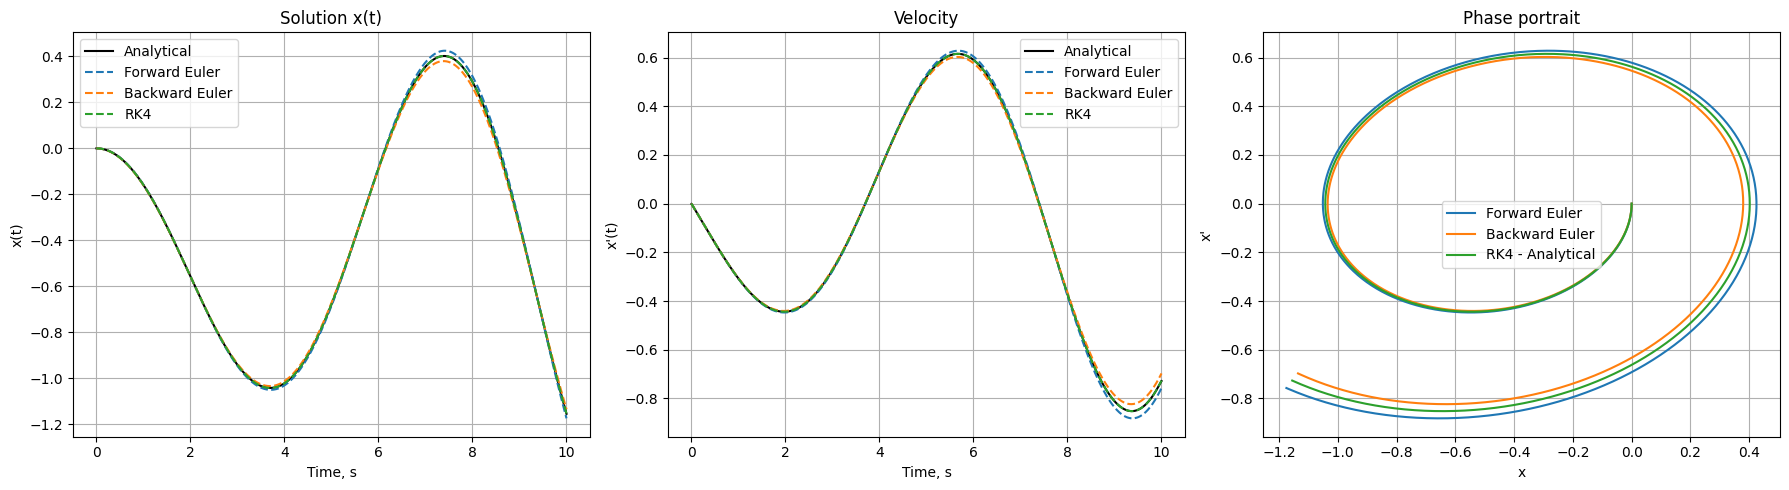

In [5]:
import numpy as np
import matplotlib.pyplot as plt
a = 7.94
b = -1.4
c = 5.79
d = -2.53
x0_val = 0.0      
v0_val = 0.0       
Tf = 10.0
h = 0.01
def ode_system(x):
    x1 = x[0]
    x2 = x[1]
    dx1 = x2
    dx2 = (d - b * x2 - c * x1) / a
    return np.array([dx1, dx2])
def forward_euler(fun, x0, Tf, h):
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0
    for k in range(len(t) - 1):
        x_hist[:, k+1] = x_hist[:, k] + h * fun(x_hist[:, k])
    return x_hist, t
def backward_euler(fun, x0, Tf, h, tol=1e-8, max_iter=100):
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0

    for k in range(len(t) - 1):
        x_next = x_hist[:, k].copy() # Initial guess
        for _ in range(max_iter):
            x_new = x_hist[:, k] + h * fun(x_next)
            if np.linalg.norm(x_new - x_next) < tol:
                x_next = x_new
                break
            x_next = x_new
        x_hist[:, k+1] = x_next
    return x_hist, t
def runge_kutta4(fun, x0, Tf, h):
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0

    for k in range(len(t) - 1):
        xk = x_hist[:, k]

        k1 = fun(xk)
        k2 = fun(xk + 0.5 * h * k1)
        k3 = fun(xk + 0.5 * h * k2)
        k4 = fun(xk + h * k3)

        x_hist[:, k+1] = xk + (h / 6.0) * (k1 + 2*k2 + 2*k3 + k4)

    return x_hist, t

#analytically
p = b / a
q = c / a
s = d / a

x_p = d / c

alpha = -p / 2.0
beta_sq = 4.0 * q - p**2
if beta_sq > 0:
    beta = 0.5 * np.sqrt(beta_sq)
else:
    beta = 0.0
C1 = x0_val - x_p
if beta != 0:
    C2 = (v0_val - alpha * C1) / beta
else:
    C2 = 0.0
def x_analytic(t):
    return x_p + np.exp(alpha * t) * (C1 * np.cos(beta * t) + C2 * np.sin(beta * t))

x0_vec = np.array([x0_val, v0_val])

x_fe, t_fe   = forward_euler(ode_system, x0_vec, Tf, h)
x_be, t_be   = backward_euler(ode_system, x0_vec, Tf, h)
x_rk4, t_rk4 = runge_kutta4(ode_system, x0_vec, Tf, h)
x_an = x_analytic(t_fe)

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.plot(t_fe, x_an, 'k', label='Analytical')
plt.plot(t_fe, x_fe[0], '--', label='Forward Euler')
plt.plot(t_be, x_be[0], '--', label='Backward Euler')
plt.plot(t_rk4, x_rk4[0], '--', label='RK4')
plt.xlabel('Time, s')
plt.ylabel('x(t)')
plt.title('Solution x(t)')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)

dx_an = np.gradient(x_an, h)
plt.plot(t_fe, dx_an, 'k', label='Analytical')
plt.plot(t_fe, x_fe[1], '--', label='Forward Euler')
plt.plot(t_be, x_be[1], '--', label='Backward Euler')
plt.plot(t_rk4, x_rk4[1], '--', label='RK4')
plt.xlabel('Time, s')
plt.ylabel("x'(t)")
plt.title("Velocity")
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(x_fe[0], x_fe[1], label='Forward Euler')
plt.plot(x_be[0], x_be[1], label='Backward Euler')
plt.plot(x_rk4[0], x_rk4[1], label='RK4 - Analytical')
plt.xlabel('x')
plt.ylabel("x'")
plt.title('Phase portrait')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()